# Chapter 3 - Within Person Models

Chapter 3 focuses on the introduction of within-person analysis, in which each peron has more than one measurement. Upon introducing different variants of ANOVA models for longitudinal data, criteria for comparing different models are also provided.
The data used in this example are two different datasets:
1. A mock-up dataset consisting on learning outcome from 50 students assigned randomly to a treatment and control group.
2. A subset of the [Octogenarian Twin Study of Aging](https://www.maelstrom-research.org/study/octo-twin) dataset, which was already used in [Chapter 2](../02/02_Notebook.ipynb).


In [2]:
import math
import os

import matplotlib.pyplot as plt
import pandas as pd
from sas7bdat import SAS7BDAT
import scipy.stats
import seaborn as sns
import statsmodels.formula.api
import statsmodels.stats.anova

## Constants

In [3]:
# File paths
STUDENTS_FILE_PATH = os.path.join("Data", "SAS_Chapter3a.sas7bdat")
TWIN_FILE_PATH = os.path.join("Data", "SAS_Chapter3b.sas7bdat")

## Read Data

In [4]:
with SAS7BDAT(STUDENTS_FILE_PATH, skip_header=False) as reader:
    students_df = reader.to_data_frame()

with SAS7BDAT(TWIN_FILE_PATH, skip_header=False) as reader:
    twin_df = reader.to_data_frame()

## Extending Between-Person Models to Within-Person Models

In [16]:
students_df_melt = pd.melt(students_df, id_vars=["PersonID", "group"], var_name="outcome")
students_df_melt = students_df_melt.rename(columns={"outcome":"time"})
students_df_melt["time"] = students_df_melt["time"].map({"outcome1":"pre-test","outcome2":"post-test"})

time_categorical_dtype = pd.CategoricalDtype(categories=["pre-test","post-test"], ordered=True)
group_categorical_dtype = pd.CategoricalDtype(categories=[1,2], ordered=True)

students_df_melt["time"] = students_df_melt["time"].astype(time_categorical_dtype)
students_df_melt["group"] = students_df_melt["group"].astype(group_categorical_dtype) 
students_df_melt.head()

,PersonID,group,time,value
0,1.0,1,pre-test,55.957284
1,2.0,1,pre-test,53.751908
2,3.0,1,pre-test,53.255502
3,4.0,1,pre-test,44.796029
4,5.0,1,pre-test,47.155838


Text(0, 0.5, 'Outcome Y')

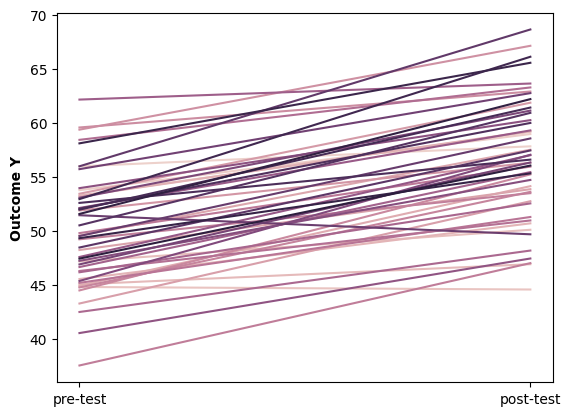

In [20]:
ax = sns.lineplot(data=students_df_melt, x="time",y="value", hue="PersonID")
ax.get_legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Outcome Y", fontweight="bold")

### A Between-Person Empty Model

In [21]:
students_bp_empty_model = statsmodels.formula.api.ols("value ~ 1", data=students_df_melt).fit()
students_bp_empty_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 30 Aug 2024   Prob (F-statistic):                nan
Time:                        09:51:19   Log-Likelihood:                -326.25
No. Observations:                 100   AIC:                             654.5
Df Residuals:                      99   BIC:                             657.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.3396      0.635     83.986      0.000      52.079      54.600
==============================================================================
Omnibus:                        1.295   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.174
Skew:                           0.102   Prob(JB):                        0.556
Kurtosis:                       2.510   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
print(f"Residual variance of BP empty model: {students_bp_empty_model.mse_resid:.2f}")

Residual variance of BP empty model: 40.34


### A Within-Person Empty Model

In [26]:
students_wp_empty_model = statsmodels.formula.api.mixedlm("value ~ 1", data=students_df_melt, groups=students_df_melt["PersonID"]).fit()
students_wp_empty_model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: value    
No. Observations: 100     Method:             REML     
No. Groups:       50      Scale:              28.2067  
Min. group size:  2       Log-Likelihood:     -323.4047
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    53.340    0.726 73.468 0.000 51.917 54.763
Group Var    12.252    1.411                           
=======================================================

"""